In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:

data = pd.read_csv("data.csv")


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

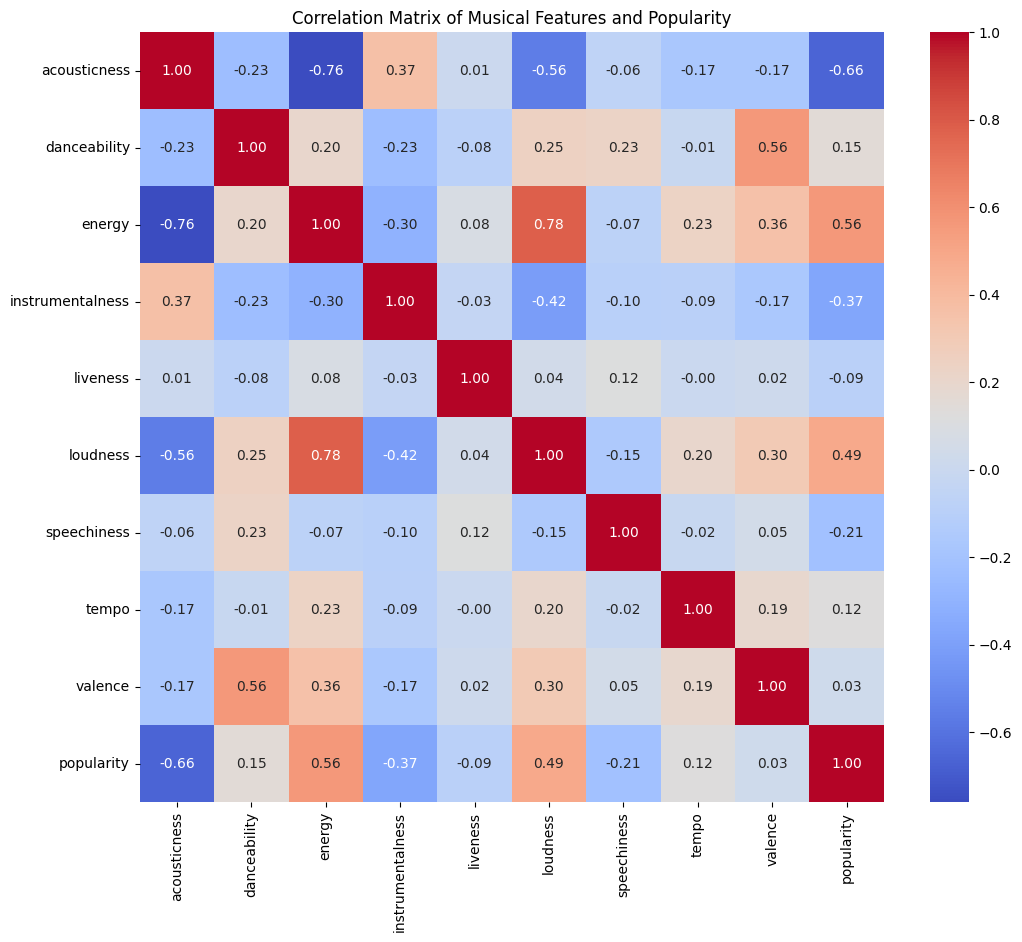

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# Calculate correlation matrix
corr_matrix = data[features+ ['popularity']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Musical Features and Popularity")
plt.show()

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Fill NaN values with the mean of each column for the selected features
data_filled = data.fillna(data[features].mean())

# Scaling the feature values of the filled dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_filled[features])


In [ ]:
def batch_cosine_similarity(song_index, features, batch_size=1000):
    num_songs = features.shape[0]
    similarities = np.zeros(num_songs)

    for start_index in range(0, num_songs, batch_size):
        end_index = min(start_index + batch_size, num_songs)
        batch = features[start_index:end_index]

        sim = cosine_similarity([features[song_index]], batch)
        similarities[start_index:end_index] = sim

    return similarities


In [ ]:
def get_song_index(song_name):
    return data_filled[data_filled['name'].str.lower() == song_name.lower()].index[0]

def recommend_song_by_name(song_name, features, num_recommendations=10):
    song_index = get_song_index(song_name)
    similarities = batch_cosine_similarity(song_index, features)
    similar_indices = np.argsort(-similarities)[1:num_recommendations+1]
    recommendations = data_filled.iloc[similar_indices]

    columns = ['name'] + [col for col in recommendations.columns if col != 'name']
    return recommendations[columns]

def recommend_song_pca(song_name, scaled_features, num_recommendations=10):
    pca = PCA(n_components=0.95)
    pca_features = pca.fit_transform(scaled_features)
    song_index = get_song_index(song_name)
    similarities = batch_cosine_similarity(song_index, pca_features)
    similar_indices = np.argsort(-similarities)[1:num_recommendations+1]
    recommendations = data_filled.iloc[similar_indices]
    columns = ['name'] + [col for col in recommendations.columns if col != 'name']


    return recommendations[columns]


In [ ]:
def plot_recommendations(recommendations, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=recommendations, x='energy', y='danceability', hue='valence', size='popularity', sizes=(50, 200))
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [ ]:
song_name = "Our Song"

# Direct feature-based recommendations
direct_recommendations = recommend_song_by_name(song_name, scaled_features, 10)
print("Direct Feature-Based Recommendations:")
print(direct_recommendations[['name', 'artists']])

# PCA-based recommendations
pca_recommendations = recommend_song_pca(song_name, scaled_features, 10)
print("PCA-Based Recommendations:")
print(pca_recommendations[['name', 'artists']])



Direct Feature-Based Recommendations:
                                                    name  \
36073  Sweetest Girl (Dollar Bill) (feat. Akon, Lil' ...   
18361                                               Roar   
14772                           I Can Love You Like That   
35687                           I Can Love You Like That   
15680                                    I'm Like A Bird   
17535                                  Rockin' That Shit   
33668                       #1 Crush - Nellee Hooper Mix   
36502                                          Jim Sharp   
17330                                           Fearless   
17803                                    F**kin' Perfect   

                                            artists  
36073  ['Wyclef Jean', 'Akon', 'Lil Wayne', 'Niia']  
18361                                ['Katy Perry']  
14772                                 ['All-4-One']  
35687                                 ['All-4-One']  
15680                          

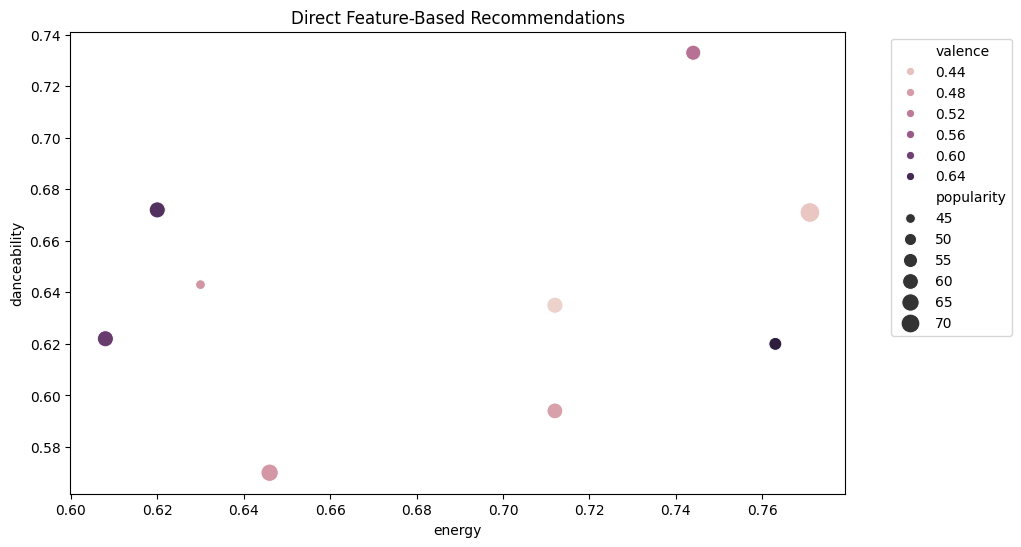

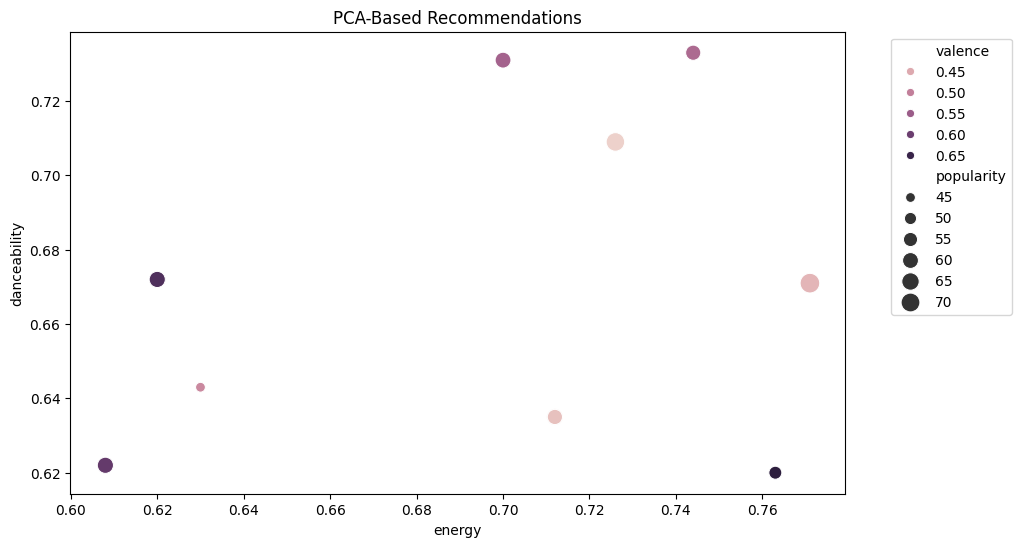

In [ ]:
# Visualize Direct Feature-Based Recommendations
plot_recommendations(direct_recommendations, "Direct Feature-Based Recommendations")

# Visualize PCA-Based Recommendations
plot_recommendations(pca_recommendations, "PCA-Based Recommendations")


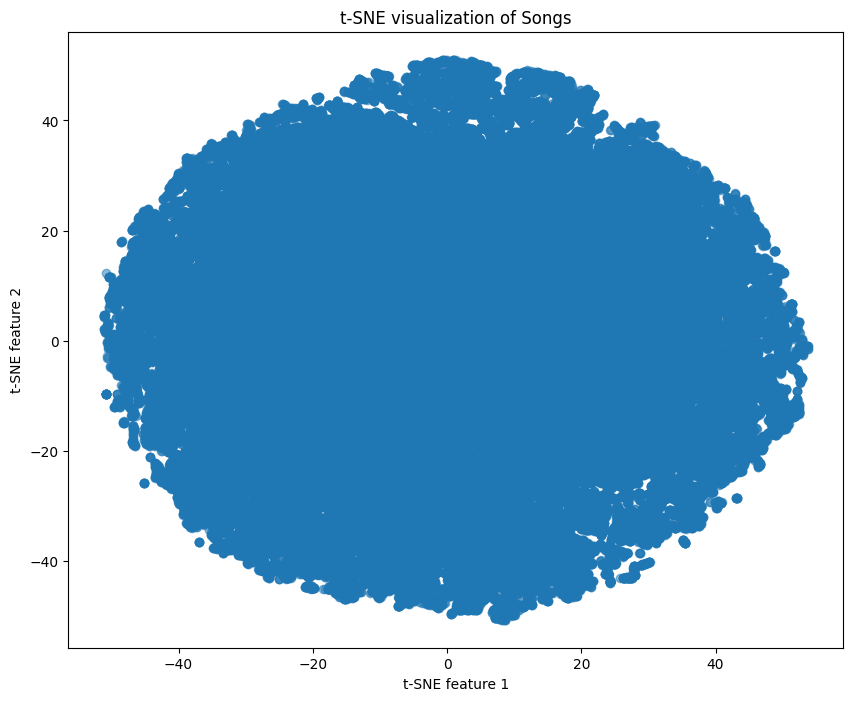

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, perplexity=5,learning_rate=200, n_iter=1000)
tsne_features = tsne.fit_transform(scaled_features)

# Visualize the result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.5)
plt.title('t-SNE visualization of Songs')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
from scipy.spatial.distance import cdist

def find_similar_songs_tsne(song_index, tsne_features, num_recommendations=5):
    # Calculate distances from the target song to all others
    distances = cdist(tsne_features[song_index].reshape(1, -1), tsne_features, 'euclidean')

    # Get the indices of the songs with the smallest distances
    indices = np.argsort(distances)[0][1:num_recommendations+1]

    return data_filled.iloc[indices][['name', 'artists', 'year']]

song_index = 100
similar_songs = find_similar_songs_tsne(song_index, tsne_features, 5)
print("Similar Songs Based on t-SNE Features:")
print(similar_songs)


NameError: name 'tsne_features' is not defined

In [ ]:
# K-Means clustering
n_clusters = 25  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_filled['cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
def recommend_songs_from_cluster(song_name, data, num_recommendations=10):

    # Find the cluster of the given song
    song_cluster = data[data['name'].str.lower() == song_name.lower()]['cluster'].iloc[0]

    # Filter songs from the same cluster
    cluster_songs = data[data['cluster'] == song_cluster]

    recommendations = cluster_songs.sample(n=num_recommendations)
    columns = ['name'] + [col for col in recommendations.columns if col != 'name']

    # Return only the desired columns, ensuring they exist in 'data'
    return recommendations[columns]



In [ ]:
def collect_recommendations(song_name, data, features, scaled_features, num_recommendations=10):
    recommendations = {}

    # Cluster-based recommendations
    recommendations['Cluster'] = recommend_songs_from_cluster(song_name, data, num_recommendations)
    print(recommendations['Cluster']['name'] )

    # Direct feature-based recommendations
    recommendations['Direct Features'] = recommend_song_by_name(song_name, features, num_recommendations)

    # PCA-based recommendations
    recommendations['PCA'] = recommend_song_pca(song_name, scaled_features, num_recommendations)

    return recommendations


In [ ]:
def plot_all_recommendations(recommendations):
    fig, axes = plt.subplots(1, len(recommendations), figsize=(15, 5), sharey=True)

    for ax, (method, recs) in zip(axes, recommendations.items()):
        if not recs.empty and 'energy' in recs.columns:
            sns.scatterplot(ax=ax, data=recs, x='energy', y='danceability', hue='valence', size='popularity', sizes=(50, 200))
            ax.set_title(f"{method} Recommendations")
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.text(0.5, 0.5, f"No Data for {method}", ha='center', va='center')
            ax.set_title(f"{method} Recommendations")

    plt.tight_layout()
    plt.show()



In [ ]:
song_name = "Our Song"  # Replace with the appropriate song

# Collect recommendations
all_recommendations = collect_recommendations(song_name, data_filled, scaled_features, scaled_features, 10)
print(all_recommendations)
# Visualize all recommendations
# Assuming all recommendations are collected in all_recommendations
def compare_recommendations(all_recommendations):
    for method, recs in all_recommendations.items():
        print(f"Method: {method}")
        display(recs)

compare_recommendations(all_recommendations)



14072                                       Freak Me
35451                                        AMERIKA
16934                            These Are My People
31663              A Night like This - 2006 Remaster
29348                          Soul Power 74 - Pt. 2
13653                                     Feels Good
33295                                       Mr. Vain
9451                                 Feelin' Alright
19004    Wat's Wrong (feat. Zacari & Kendrick Lamar)
18364     Everybody (Backstreet's Back) - Radio Edit
Name: name, dtype: object
{'Cluster':                                               name  valence  year  \
14072                                     Freak Me    0.725  1992   
35451                                      AMERIKA    0.518  2004   
16934                          These Are My People    0.630  2006   
31663            A Night like This - 2006 Remaster    0.656  1985   
29348                        Soul Power 74 - Pt. 2    0.943  1974   
13653             

,name,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster
14072,Freak Me,0.725,1992,0.02950,['Silk'],0.697,274533,0.608,0,5CdJveJgiGXoGwDFqF6afp,0.000000,4,0.276,-10.976,0,58.0,1992,0.0463,133.879,17
35451,AMERIKA,0.518,2004,0.00258,['Rammstein'],0.608,226760,0.885,0,33ayEZDfgARpadIdqo87JQ,0.000013,2,0.392,-4.296,0,57.0,2004-09-27,0.0963,125.023,17
16934,These Are My People,0.630,2006,0.03160,['Rodney Atkins'],0.558,213653,0.896,0,5jFid6SUnYqohvNvNuZvIz,0.000000,0,0.528,-3.687,1,61.0,2006-07-18,0.0545,90.064,17
31663,A Night like This - 2006 Remaster,0.656,1985,0.00879,['The Cure'],0.629,256320,0.871,0,7cKCz7gG84i1XLvDeM3ByT,0.002420,6,0.228,-6.852,0,39.0,1985-08-26,0.0287,121.958,17
29348,Soul Power 74 - Pt. 2,0.943,1974,0.28500,['Maceo And The Macks'],0.816,248227,0.736,0,7rFS1AleVTvi4Ye5fzLL44,0.247000,7,0.438,-5.511,1,51.0,1974-02-19,0.0403,105.213,17
13653,Feels Good,0.635,1990,0.11500,['Tony! Toni! Toné!'],0.827,298373,0.852,0,4cRR2gUTOerkUOW5iZpm91,0.000015,2,0.299,-12.052,1,56.0,1990-01-01,0.0942,117.170,17
33295,Mr. Vain,0.400,1993,0.04780,['Culture Beat'],0.676,336840,0.996,0,2rTYgHxgcndkUrRoU7x0Sv,0.262000,9,0.333,-7.946,0,59.0,1993-01-01,0.0397,132.871,17
9451,Feelin' Alright,0.895,1969,0.62500,['Joe Cocker'],0.535,250840,0.824,0,0Jl5bIEve3A4axcjY3EgDZ,0.037900,5,0.299,-10.142,1,61.0,1969-05-01,0.0391,90.120,17
19004,Wat's Wrong (feat. Zacari & Kendrick Lamar),0.313,2016,0.15100,"['Isaiah Rashad', 'Zacari', 'Kendrick Lamar']",0.706,330783,0.688,1,2RPbEp0DyBVlkRvvYKopO7,0.000000,1,0.466,-6.357,1,67.0,2016-09-02,0.2690,125.966,17
18364,Everybody (Backstreet's Back) - Radio Edit,0.586,2013,0.02500,['Backstreet Boys'],0.735,224960,0.873,0,4rTeOSYqwXNz5qPR2DUTFZ,0.000003,10,0.265,-3.493,0,62.0,2013-06-10,0.0402,108.021,17


Method: Direct Features


,name,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster
36073,"Sweetest Girl (Dollar Bill) (feat. Akon, Lil' ...",0.529,2007,0.077200,"['Wyclef Jean', 'Akon', 'Lil Wayne', 'Niia']",0.733,241133,0.744,0,4liGjmhCupa7RP9JaQELYx,0.000000,1,0.341,-3.510,1,58.0,2007-08-14,0.0553,92.515,17
18361,Roar,0.436,2013,0.004920,['Katy Perry'],0.671,223546,0.771,0,27tNWlhdAryQY04Gb2ZhUI,0.000007,7,0.354,-4.821,0,73.0,2013-01-01,0.0316,90.003,17
14772,I Can Love You Like That,0.423,1995,0.081100,['All-4-One'],0.635,257960,0.712,0,70d8omRI2p7qesFOiy55Ro,0.000000,8,0.322,-4.998,1,58.0,1995-01-01,0.0283,91.024,18
35687,I Can Love You Like That,0.423,2005,0.081100,['All-4-One'],0.635,257960,0.712,0,4OnZR9U5JRFGF1Yza9j579,0.000000,8,0.322,-4.998,1,61.0,2005-04-19,0.0283,91.024,18
15680,I'm Like A Bird,0.607,2000,0.138000,['Nelly Furtado'],0.622,243160,0.608,0,4sUoWHVnJl8z3t4zdqf6xB,0.000005,10,0.273,-5.085,1,61.0,2000-01-01,0.0360,89.661,17
17535,Rockin' That Shit,0.627,2009,0.123000,['The-Dream'],0.672,221920,0.620,1,3RBGG1be9aBaSvjnw6ABkh,0.000000,8,0.362,-4.865,1,61.0,2009-01-01,0.0422,78.005,17
33668,#1 Crush - Nellee Hooper Mix,0.488,1995,0.000105,"['Garbage', 'Nellee Hooper']",0.643,290507,0.630,0,08L1WAtYQnsFBoZ3MEBkYV,0.017900,5,0.331,-7.163,1,45.0,1995,0.0236,94.199,17
36502,Jim Sharp,0.662,2009,0.045400,['Sunny Ledfurd'],0.620,195579,0.763,1,6d94C00HFoUq9fRBdJCuwd,0.000000,0,0.380,-4.501,1,52.0,2009-03-24,0.0315,76.976,17
17330,Fearless,0.476,2008,0.040000,['Taylor Swift'],0.594,241987,0.712,0,6Eu31gddWw0gOGO506pJYA,0.000000,5,0.309,-4.418,1,60.0,2008-11-11,0.0273,99.972,18
17803,F**kin' Perfect,0.485,2010,0.041200,['P!nk'],0.570,213413,0.646,1,3MGJF1CDFGfjXESL2Heva0,0.000000,7,0.362,-4.748,1,65.0,2010-11-12,0.0331,91.954,17


Method: PCA


,name,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster
36073,"Sweetest Girl (Dollar Bill) (feat. Akon, Lil' ...",0.529,2007,0.077200,"['Wyclef Jean', 'Akon', 'Lil Wayne', 'Niia']",0.733,241133,0.744,0,4liGjmhCupa7RP9JaQELYx,0.000000,1,0.341,-3.510,1,58.0,2007-08-14,0.0553,92.515,17
18361,Roar,0.436,2013,0.004920,['Katy Perry'],0.671,223546,0.771,0,27tNWlhdAryQY04Gb2ZhUI,0.000007,7,0.354,-4.821,0,73.0,2013-01-01,0.0316,90.003,17
15680,I'm Like A Bird,0.607,2000,0.138000,['Nelly Furtado'],0.622,243160,0.608,0,4sUoWHVnJl8z3t4zdqf6xB,0.000005,10,0.273,-5.085,1,61.0,2000-01-01,0.0360,89.661,17
35687,I Can Love You Like That,0.423,2005,0.081100,['All-4-One'],0.635,257960,0.712,0,4OnZR9U5JRFGF1Yza9j579,0.000000,8,0.322,-4.998,1,61.0,2005-04-19,0.0283,91.024,18
14772,I Can Love You Like That,0.423,1995,0.081100,['All-4-One'],0.635,257960,0.712,0,70d8omRI2p7qesFOiy55Ro,0.000000,8,0.322,-4.998,1,58.0,1995-01-01,0.0283,91.024,18
17535,Rockin' That Shit,0.627,2009,0.123000,['The-Dream'],0.672,221920,0.620,1,3RBGG1be9aBaSvjnw6ABkh,0.000000,8,0.362,-4.865,1,61.0,2009-01-01,0.0422,78.005,17
33668,#1 Crush - Nellee Hooper Mix,0.488,1995,0.000105,"['Garbage', 'Nellee Hooper']",0.643,290507,0.630,0,08L1WAtYQnsFBoZ3MEBkYV,0.017900,5,0.331,-7.163,1,45.0,1995,0.0236,94.199,17
32472,I Don't Wanna Lose You,0.540,1989,0.328000,['Tina Turner'],0.731,253173,0.700,0,2TxWkdptNrm2Z0CZfMr3Iq,0.000000,1,0.278,-6.211,1,60.0,1989-09-13,0.0275,94.037,17
35753,Sensacion Del Bloque,0.404,2006,0.097700,['De La Ghetto'],0.709,182187,0.726,1,5clFSlfkCRlhnH1cAQjSBi,0.000000,7,0.301,-7.129,1,69.0,2006-01-01,0.0411,92.006,17
36502,Jim Sharp,0.662,2009,0.045400,['Sunny Ledfurd'],0.620,195579,0.763,1,6d94C00HFoUq9fRBdJCuwd,0.000000,0,0.380,-4.501,1,52.0,2009-03-24,0.0315,76.976,17
